In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.???
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


In [6]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.1)
lassfit = lass.fit(X_train, Y_train)
print('R² for lasso regression model with few features on training set:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
for i in range(len(origparams)-1):
    print('{}: {:.4f}'.format(X_train.columns[i], origparams[i]))

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.1)
lassBig.fit(X_train2, Y_train)
print('\nR² for lasso regression model with many features on training set:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
for i in range(len(origparams)-1):
    print('{}: {}'.format(X_train2.columns[i], origparams[i]))

R² for lasso regression model with few features on training set:
0.5635902495700011

Parameter estimates for the model with few features:
default: 0.0000
student: -0.6582
balance: -0.0000

R² for lasso regression model with many features on training set:
0.5630894936716484

Parameter estimates for the model with many features:
default: 0.0
student: -0.6540931165485392
balance: 0.0
balance_student: -0.0
balance_default: 0.0
student_default: -0.0
balance_sqrt: 0.0
balance2: -8.125965142119828e-05
balance3: -6.651472344782182e-08


In [7]:
print('\nR-squared lasso regression model with few features on test set:')
print(lass.score(X_test, Y_test))

print('\nR-squared lasso regression model with many features on test set:')
print(lassBig.score(X_test2, Y_test))


R-squared lasso regression model with few features on test set:
0.5550494466587756

R-squared lasso regression model with many features on test set:
0.5546727927200348


In [39]:
alpha = np.around(np.linspace(0.01, 1, 110), 2)

lasso_vals = []
ridge_vals = []

for lambd in alpha:
    lassoBig = linear_model.Lasso(alpha=lambd)
    lassoBig.fit(X_train2, Y_train)
    r_square_lasso = lassoBig.score(X_train2, Y_train)
    lasso_vals.append(r_square_lasso)
    
    ridgeBig = linear_model.Ridge(alpha=lambd)
    ridgeBig.fit(X_train2, Y_train)
    r_square_ridge = ridgeBig.score(X_train2, Y_train)
    ridge_vals.append(r_square_ridge)
    

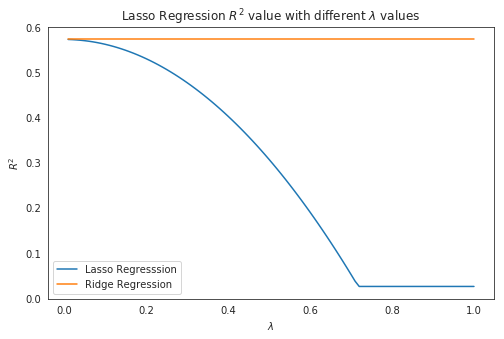

In [40]:
plt.figure(figsize=(8,5))
plt.plot(alpha, lasso_vals, label='Lasso Regresssion')
plt.plot(alpha, ridge_vals, label='Ridge Regression')
plt.title('Lasso Regression $R^2$ value with different $\lambda$ values')
plt.xlabel('$\lambda$')
plt.ylabel('$R^2$')
plt.legend()
plt.show()

In [41]:
print(ridge_vals[:10])
print(lasso_vals[:10])

[0.5739723179972084, 0.5739723169065798, 0.573972316532436, 0.5739723163338071, 0.5739723162023578, 0.5739723161019563, 0.5739723161019563, 0.5739723160171132, 0.573972315940082, 0.5739723158665584]
[0.5737681044618193, 0.5733739342611162, 0.5727518413871451, 0.5720087276567742, 0.5710532985531875, 0.5698849880664936, 0.5698849880664936, 0.5685046614224027, 0.5669119701418983, 0.5651069142249803]


It looks as if with the first view values, the R^2 values are somewhat similar for the low alphas (0.01 etc) but then as the alpha's increase up to the value of 1, then Lasso Regression R^2 values drop very quickly, whereas the R^2 values for ridge regression drop much more slowly.

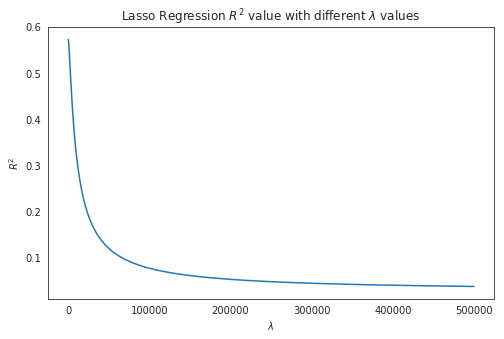

In [65]:
alpha = np.linspace(1, 5e5, 10000)

ridge_vals = []

for lambd in alpha:
    
    ridgeBig = linear_model.Ridge(alpha=lambd)
    ridgeBig.fit(X_train2, Y_train)
    r_square_ridge = ridgeBig.score(X_train2, Y_train)
    ridge_vals.append(r_square_ridge)
    
plt.figure(figsize=(8,5))
plt.plot(alpha, ridge_vals, label='Ridge Regression')
plt.title('Lasso Regression $R^2$ value with different $\lambda$ values')
plt.xlabel('$\lambda$')
plt.ylabel('$R^2$')
plt.show()